Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


Load the Dataset

In [ ]:

data = pd.read_csv('Iris.csv')




Display first 5 rows

In [ ]:
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


Check shape of the dataset

In [ ]:
print("Shape of dataset:", data.shape)

Shape of dataset: (150, 6)


Check  missing values

In [ ]:
print(data.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


Data summary

In [ ]:
print(data.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


 how many classes




In [ ]:
print(data['Species'].value_counts())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


Visualizization

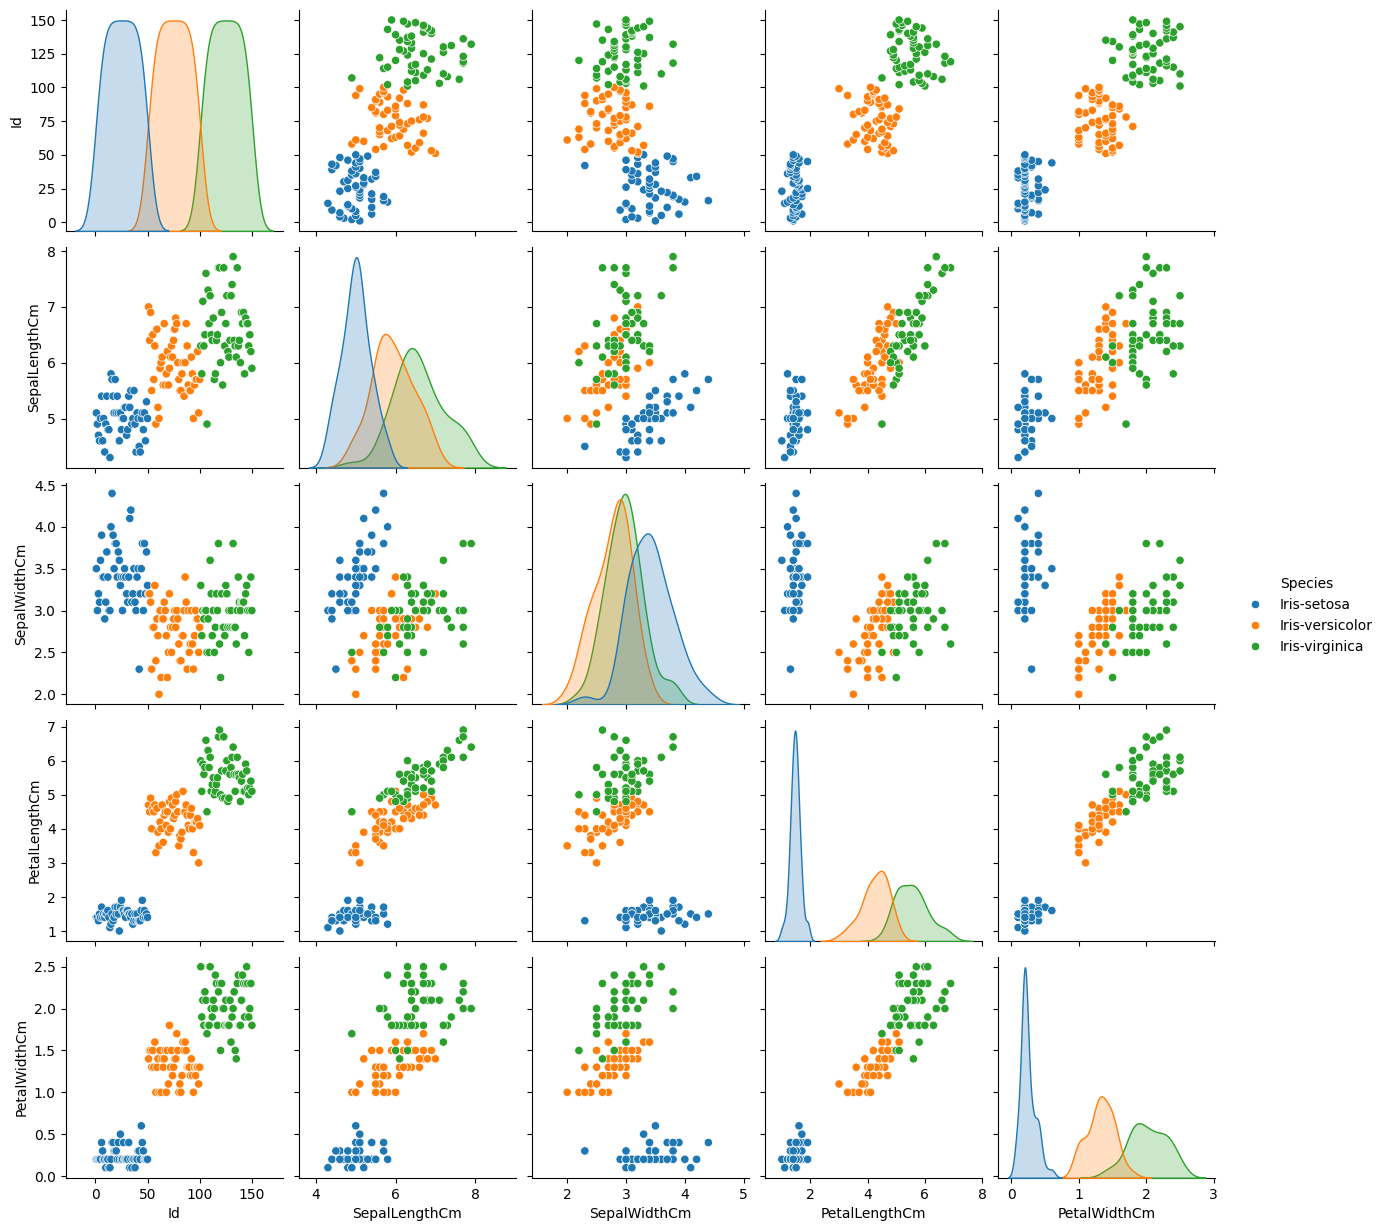

In [ ]:
sns.pairplot(data, hue='Species')
plt.show()

Preprocess the data

 Drop 'Id' column because its not useful for prediction

In [ ]:
if 'Id' in data.columns:
    data = data.drop('Id', axis=1)

Encode the target labels

In [ ]:
label_encoder = LabelEncoder()
data['Species'] = label_encoder.fit_transform(data['Species'])

Split into Features and Labels

Features and Target

In [ ]:
X = data.drop('Species', axis=1)
y = data['Species']

Train and Test Split

Split into training and testing

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Training the Model

Initialize the model

In [ ]:
model = RandomForestClassifier()

Train the model

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier()

 Evaluate the Model

Predicting on the test set

In [ ]:
y_pred = model.predict(X_test)

Checking accuracy

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


Confusion matrix

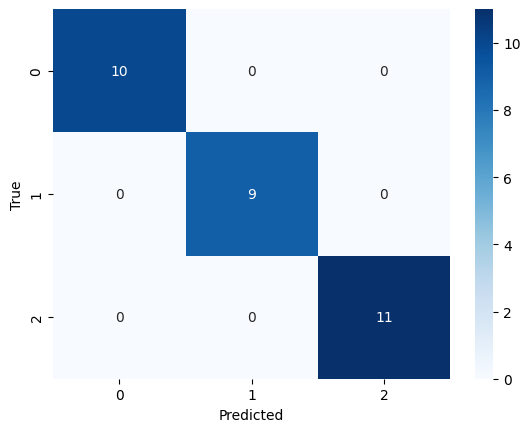

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

 classification report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Prediction on a new sample

In [ ]:

sample = np.array([[5.1, 3.5, 1.4, 0.2]])
predicted_class = model.predict(sample)
species = label_encoder.inverse_transform(predicted_class)
print("Predicted Species:", species[0])


Predicted Species: Iris-setosa


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Ploting feature importance

In [ ]:
importances = model.feature_importances_
feature_names = X.columns

Creating a bar chart

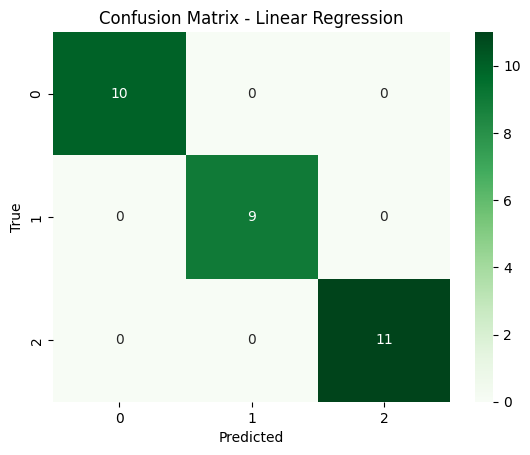

In [24]:
cm_lr = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Linear Regression')
plt.show()

Saving the model

In [25]:
import joblib

joblib.dump(model, 'iris_random_forest_model.pkl')

joblib.dump(label_encoder, 'label_encoder.pkl')


['label_encoder.pkl']

Loading the saved model

In [26]:
loaded_model = joblib.load('iris_random_forest_model.pkl')
loaded_encoder = joblib.load('label_encoder.pkl')